# Machine Learning Indonesian.AI
Pertemuan - 6 Decision Tree dan Random forest

## Libraries

In [239]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Load Datasets

In [240]:
df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Explore data

In [241]:
print(f'Total data : {df.shape[0]}')
print(f'Total column : {df.shape[1]}')

Total data : 41188
Total column : 21


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [243]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Check unique data

In [244]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

### Missing Value

In [245]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### feature job

In [246]:
print('List job : \n')
x = [print(i) for i in df['job'].unique().tolist()]

List job : 

blue-collar
technician
management
services
retired
admin.
housemaid
unemployed
entrepreneur
self-employed
unknown
student


#### Visualization

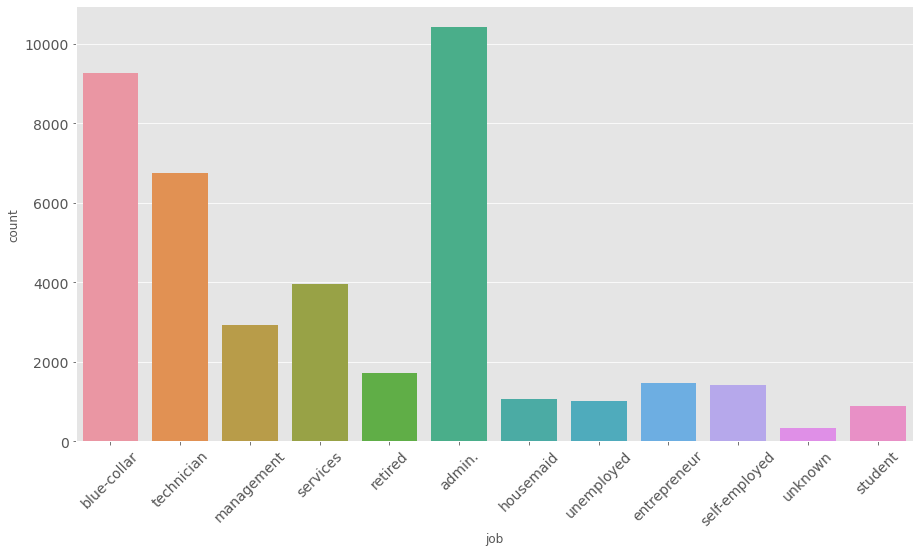

In [247]:
plt.figure(figsize=(15,8))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.show()

In [248]:
df.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,38.187296,39.555760,41.723214,45.500000,42.362859,62.027326,39.949331,37.926430,25.894857,38.507638,39.733728,45.563636
duration,254.312128,264.542360,263.267857,250.454717,257.058140,273.712209,264.142153,258.398085,283.683429,250.232241,249.451677,239.675758
campaign,2.623489,2.558461,2.535714,2.639623,2.476060,2.476744,2.660802,2.587805,2.104000,2.577339,2.564103,2.648485
pdays,954.319229,985.160363,981.267170,960.579245,962.647059,897.936047,976.621393,979.974049,840.217143,964.408127,935.316568,938.727273
previous,0.189023,0.122542,0.138736,0.137736,0.185021,0.327326,0.143561,0.154951,0.524571,0.153789,0.199211,0.154545
emp_var_rate,0.015563,0.248995,0.158723,0.433396,-0.012688,-0.698314,0.094159,0.175359,-1.408000,0.274566,-0.111736,0.357879
cons_price_idx,93.534054,93.656656,93.605372,93.676576,93.522755,93.430786,93.559982,93.634659,93.331613,93.561471,93.563781,93.718942
cons_conf_idx,-40.245433,-41.375816,-41.283654,-39.495283,-40.489466,-38.573081,-40.488107,-41.290048,-40.187543,-39.927569,-40.007594,-38.797879
euribor3m,3.550274,3.771996,3.791120,4.009645,3.611316,2.770066,3.689376,3.699187,1.884224,3.820401,3.466583,3.949033
nr_employed,5164.125350,5175.615150,5176.313530,5179.529623,5166.650513,5122.262151,5170.674384,5171.600126,5085.939086,5175.648391,5157.156509,5172.931818


### feature marital

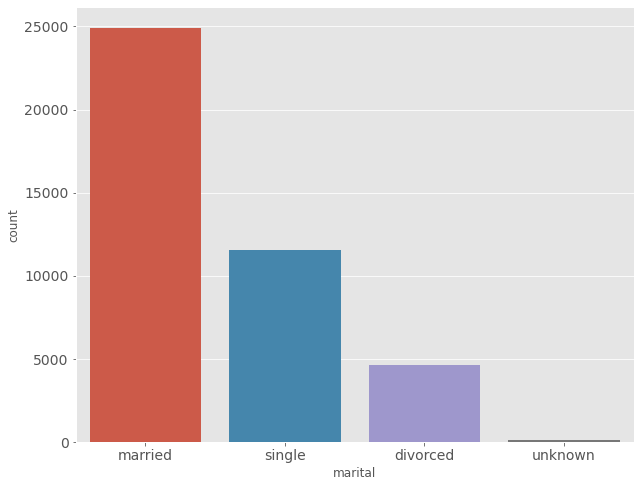

In [249]:
plt.figure(figsize=(10,8))
sns.countplot(x='marital', data=df)
plt.show()

In [250]:
df.groupby('marital').mean().T

marital,divorced,married,single,unknown
age,44.899393,42.307165,33.158714,40.275000
duration,253.790330,257.438623,261.524378,312.725000
campaign,2.613400,2.572810,2.533800,3.187500
pdays,968.639853,967.247673,949.909578,937.100000
previous,0.168690,0.155608,0.211359,0.275000
emp_var_rate,0.163985,0.183625,-0.167989,-0.221250
cons_price_idx,93.606563,93.597367,93.517300,93.471250
cons_conf_idx,-40.707069,-40.270659,-40.918698,-40.820000
euribor3m,3.715603,3.745832,3.317447,3.313038
nr_employed,5170.878643,5171.848772,5155.199265,5157.393750


### label data

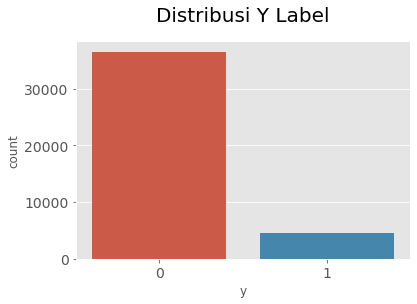

0    36548
1     4640
Name: y, dtype: int64


In [251]:
sns.countplot(x='y', data=df)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.title('Distribusi Y Label', fontsize=20, pad=20)
plt.show()
print(df.y.value_counts())

## Data Preparation

### Handling Imbalanced Data with UnderSampling

In [252]:
# split class
loan_df = df[df['y'] == 1]
notloan_df = df[df['y'] == 0]

# random sample data 
notloan_df_sample = notloan_df.sample(random_state= 78, n= 4640)

notloan_df_sample.shape

(4640, 21)

In [253]:
# concat to new data

new_df = pd.concat([notloan_df_sample, loan_df], axis=0)
new_df.y.value_counts()

0    4640
1    4640
Name: y, dtype: int64

In [266]:
df.shape

(41188, 21)

### Preprocessing categoric data

In [267]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact','month', 'day_of_week', 'poutcome']

for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1 = df.join(cat_list)
    df = data1.copy()

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  object 
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  duration                       41188 non-null  int64  
 11  campaign                       41188 non-null  int64  
 12  pdays                          41188 non-null 

In [271]:
# remove categorical data
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process

In [273]:
new_df2 = df[to_keep]
new_df2.shape

(41188, 64)

### Split data

In [274]:
X = new_df2.drop('y', axis=1)
y = new_df2['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [275]:
print(f'Total Training data : {X_train.shape[0]}')
print(f'Total Testing data : {X_test.shape[0]}')

Total Training data : 28831
Total Testing data : 12357


### Normalization

## Modeling

In [276]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [277]:
# Function Evaluate score (accuracy)
def evaluate_model(model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'], index=col_name)
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [278]:
model_dict = {'Random Forest': rf_clf}

evaluate_model(model_dict)

,Training,Testing
Random Forest,1.0,0.913571


### Evaluate

In [279]:
from sklearn.metrics import confusion_matrix, classification_report

In [280]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n RANDOM FOREST TESTING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

RANDOM FOREST TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25567
           1       1.00      1.00      1.00      3264

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Confussion Matrix ------------------------------------
[[25567     0]
 [    0  3264]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.9135712551590192
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10981
           1       0.66      0.46      0.54      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.75     12357
weighted avg       0.90      0.91      0.91     12357

Confussion Matrix -------------------------

### Check Confusion Matrix

<module 'matplotlib.pyplot' from 'C:\\Users\\USER\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

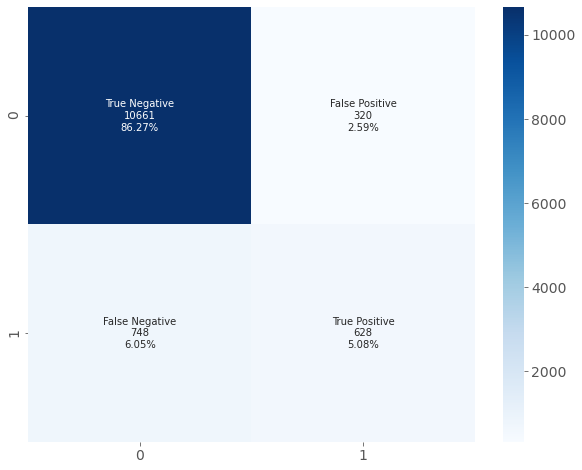

In [282]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

### Check Importance Score

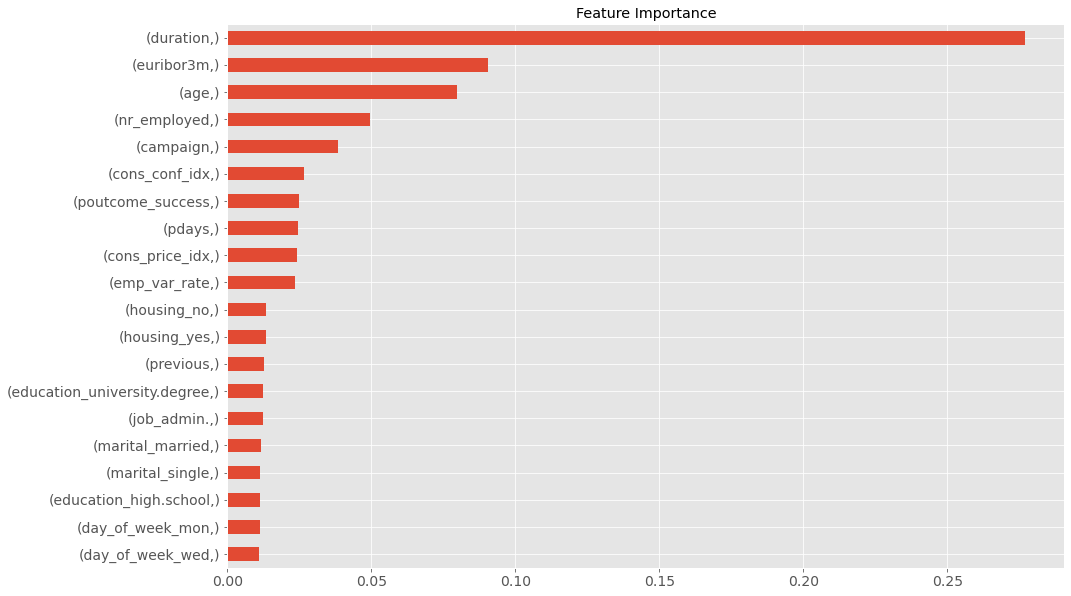

In [286]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=[X])
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

### Model Interpretation

In [288]:
! pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
shap_values = shap.TreeExplainer(rf_clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

### Dispaly Tree

In [ ]:
from sklearn.tree import export_graphviz

estimator = rf_clf.estimators_[0] # choose only 1 decision tree
export_graphviz(estimator, rounded=True, proportion=False, out_file='tree.dot', 
                feature_names=X_train.columns, precision=2, filled=True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')